天马玻璃数据分析

1.拉引量、碎玻璃比例-温度关系

2.拉引量、碎玻璃比例-天然气流量关系

1.数据处理

In [1]:
# 导入程序库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
import seaborn as sns
sns.set(style="ticks")

plt.style.use("seaborn")
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False #用来正常显示负号
barfont = labelfont = {
    "family": "SimHei",
    "weight": "normal",
    "size": 12,
    "color": "#4169E1"
}
titlefont = {
    "family": "SimHei",
    "weight": "normal",
    "size": 14,
    "color": "#9400D3"
}

k:\python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
k:\python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
k:\python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# 数据获取，读取csv
import re
import os
datas_path = "./data/"
datas_0 = {}

for i in os.listdir(datas_path):
    if not i.endswith("xls"):
        continue
    cols = ['日期', '拉引量', '温度', 'Gas/Hour', '碎玻比例']
    df = pd.read_excel(datas_path+i,sheet_name="Furnace",names=cols,usecols=range(0,5))
    df.dropna()
    index = df[df["拉引量"] == "拉引量"].index.tolist()[0]
    # index = df[df["拉引量"] == "拉引量"].index
    df = df[index+1:]
    df = df[~df["拉引量"].astype(str).str.match("约")]

    datas_0[i] = df

    # for sample_data in df.itertuples(index=True,name="Pandas"):
    #     if "拉引量" in sample_data:
    #         df.columns = sample_data[1:]
    # df = df[df['拉引量'].apply(
    # lambda x: True if re.match(r"([1-9][0-9]*|0)\.[0-9]+", str(x)) and re.match(
    #     r"([1-9][0-9]*|0)\.[0-9]+", str(x)).group(0) == str(x) else False)].copy()
    # df=df.rename(columns={np.NaN:'Date',"日期":"Date","NaT":"Date"})

# datas_0

In [3]:
# 数据处理
datas_1 = pd.DataFrame()
for key,value in datas_0.items():
    datas01 = value
    # columns = key
    # cols = datas01.columns[5:-2]
    # datas02 = datas01.iloc[1:,5:-2]

    datas_1 = pd.concat([datas_1,datas01])
    
datas_1["日期"] = pd.to_datetime(datas_1["日期"])
datas_1[["拉引量","碎玻比例","温度","Gas/Hour"]] = datas_1[["拉引量","碎玻比例","温度","Gas/Hour"]].astype("float")

# datas_1 = datas_1[(datas_1["温度"] >1540)]
datas_1.sort_values(by=["日期"],inplace=True)

# datas_1.loc[(datas_1["碎玻比例"] >1)]["碎玻比例"]= datas_1.loc[(datas_1["碎玻比例"] >1)]["碎玻比例"]/100
datas_1.loc[(datas_1["碎玻比例"] >1),"碎玻比例"]= datas_1.loc[(datas_1["碎玻比例"] >1),"碎玻比例"]/100
# datas_1 = datas_1[(datas_1["拉引量"] >0)]
datas_1.reset_index(drop=True,inplace=True)
datas_1

日期     拉引量      温度  Gas/Hour  碎玻比例
0   2020-07-26  252.03  1575.0    1605.0  0.25
1   2020-07-27  252.08  1575.0    1600.0  0.25
2   2020-07-28  252.08  1575.0    1605.0  0.25
3   2020-07-29  254.25  1575.0    1590.0  0.25
4   2020-07-30  254.72  1572.0    1605.0  0.25
..         ...     ...     ...       ...   ...
808 2022-10-21  230.28  1572.0    1400.0  0.40
809 2022-10-22  230.01  1570.0    1380.0  0.40
810 2022-10-23  230.01  1570.0    1375.0  0.40
811 2022-10-24  230.01  1570.0    1380.0  0.40
812 2022-10-25  230.34  1570.0    1390.0  0.40

[813 rows x 5 columns]

可视化

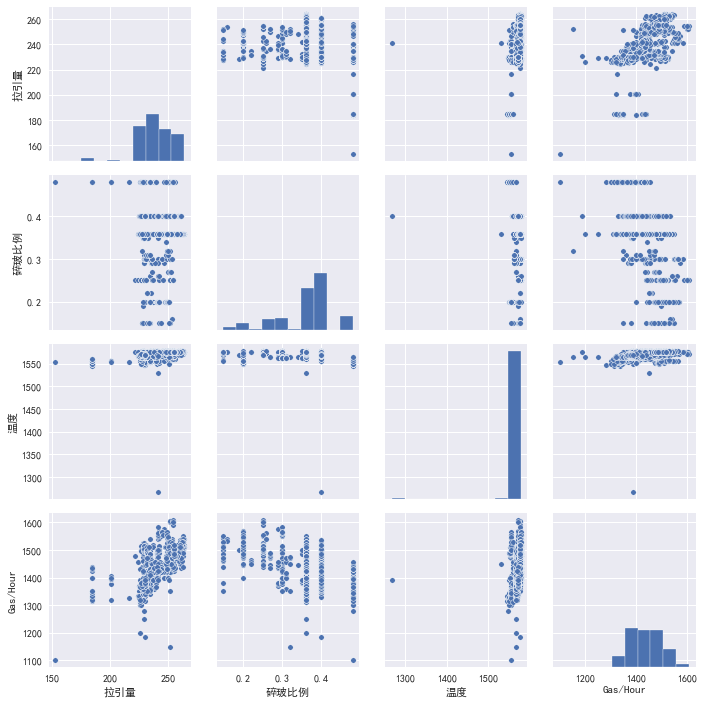

In [4]:
g = sns.PairGrid(datas_1[["拉引量","碎玻比例","温度","Gas/Hour"]])
# g.map(sns.scatterplot)
g.map_diag(plt.hist,edgecolor="w")
# g.map_offdiag(plt.scatter)
g.map_offdiag(sns.scatterplot,s=30)

In [5]:
# datas_1 = datas_1.query("拉引量>220")
datas_1 = datas_1.query("拉引量>220 & 温度>1530")
datas_1 = datas_1[(datas_1["Gas/Hour"]>1250)]
datas_1["温度log"] = np.log(datas_1["温度"].max()-datas_1["温度"]+10)

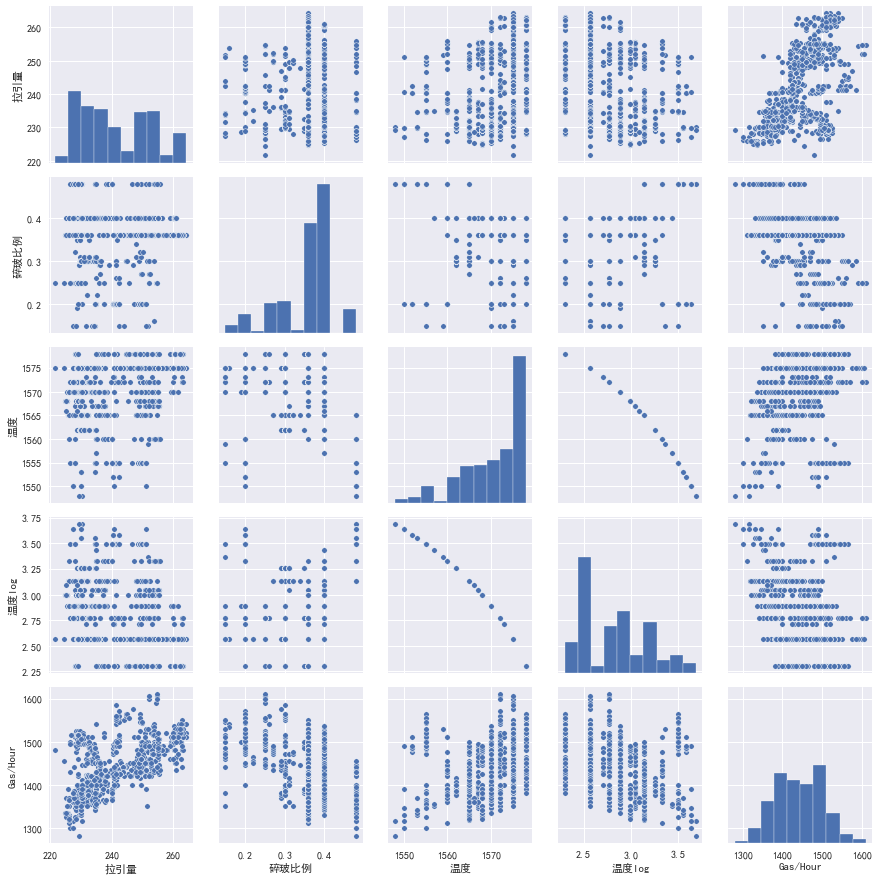

In [6]:
g = sns.PairGrid(datas_1[["拉引量","碎玻比例","温度","温度log","Gas/Hour"]])
# g.map(sns.scatterplot)
g.map_diag(plt.hist,edgecolor="w")
# g.map_offdiag(plt.scatter)
g.map_offdiag(sns.scatterplot,s=30)

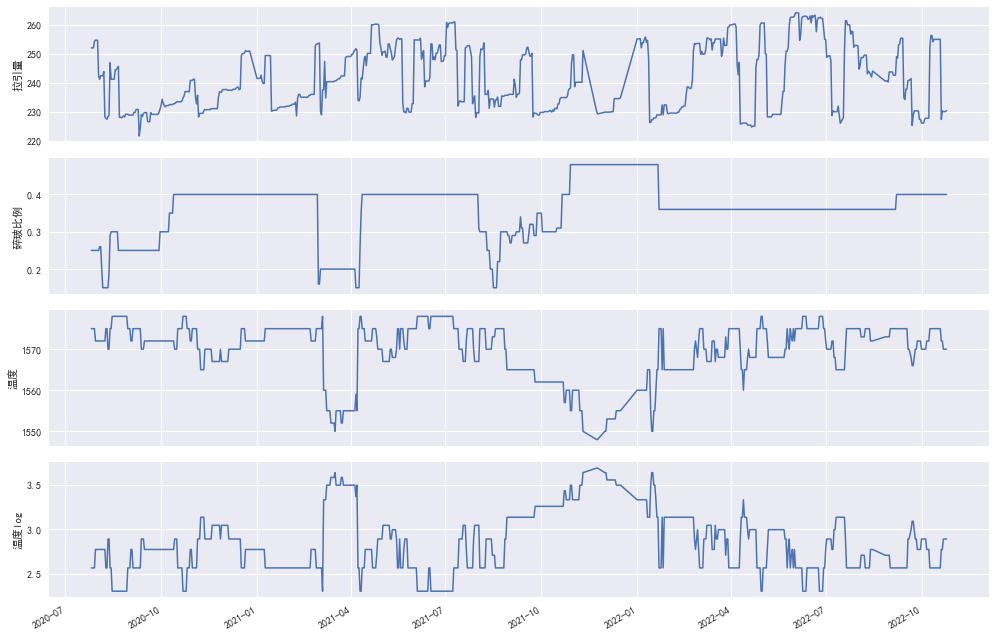

In [7]:
# 绘图
fig,axes = plt.subplots(4,1,figsize=(14,9))

# 设置格式
col_names = ["拉引量","碎玻比例","温度","温度log","Gas/Hour"]
for i in range(len(axes)):
    axes[i].plot(datas_1["日期"],datas_1[col_names[i]],label=col_names[i],linewidth=1.5)
    axes[i].set_ylabel(col_names[i])

axes[0].set_xlabel("日期")
# ax1.set_ylim(0,300)

plt.gcf().autofmt_xdate()
# plt.legend()
plt.tight_layout()

2.特征工程

In [8]:
X = datas_1[["拉引量","碎玻比例"]].astype("float")
y_tem = datas_1["温度"].astype("float")
y_temlog = datas_1["温度log"].astype("float")
y_gas = datas_1["Gas/Hour"].astype("float")

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_tem_train,y_tem_test,y_gas_train,y_gas_test,y_temlog_train,y_temlog_test = train_test_split(X,y_tem,y_gas,y_temlog,random_state=0,test_size=1/8,shuffle=False)

X_train.shape,X_test.shape,y_tem_test.shape,y_gas_test.shape,y_temlog_test.shape

((675, 2), (97, 2), (97,), (97,), (97,))

3.机器学习

In [10]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
import sklearn.metrics as sm

In [11]:
def eva_model(model, X_train, X_test, y_train, y_test, text):
    grid = model
    grid.fit(X_train, y_train)
    y_tem_pred = grid.predict(X_test)
    y_tem_pred02 = grid.predict(X_train)
    std_tem = (sm.mean_squared_error(y_test, y_tem_pred))**0.5
    print(text,"误差(%):", sm.mean_absolute_percentage_error(y_test,
          y_tem_pred)*100, "均方根误差RSME:", std_tem, "R2分数:", "train:", sm.r2_score(y_train, y_tem_pred02), 
          "test:", sm.r2_score(y_test, y_tem_pred))
    plt.figure(figsize=(15, 7))
    # plt.plot(datas_1["日期"][:y_train.shape[0]],y_train,label="温度-训练")
    plt.plot(datas_1["日期"][y_train.shape[0]:],
             y_test, marker="o", label="%s-测试"%text)
    plt.plot(datas_1["日期"][y_train.shape[0]:],
             y_tem_pred, label="%s-预测" % text, linestyle="--")
    plt.plot(datas_1["日期"][y_train.shape[0]:],
             y_tem_pred+std_tem, label="%s-预测-上限" % text, linestyle="-.")
    plt.plot(datas_1["日期"][y_train.shape[0]:],
             y_tem_pred-std_tem, label="%s-预测-下限" % text, linestyle="-.")
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.tight_layout()


In [12]:
# from sklearn.linear_model import Ridge
# from sklearn.svm import SVR
# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBRegressor
# import lightgbm as lgb

In [13]:
# model = Pipeline([("prep",MinMaxScaler()),("poly",PolynomialFeatures()),("regressor",Ridge())])

# param_grid = [
#     # {"prep":[MinMaxScaler(),None],
#     # "poly":[PolynomialFeatures()],
#     # "regressor":[Ridge()],
#     # "poly__degree":np.arange(1,5),
#     # "regressor__alpha":loguniform(1e-4,1e0)
#     # },
#     {"prep":[MinMaxScaler()],
#     "poly":[None],
#     "regressor":[SVR()],
#     "regressor__C":loguniform(1e-4,1e4),
#     "regressor__gamma":loguniform(1e-4,1e0),
#     },
#     # {"prep":[None],
#     # "poly":[None],
#     # "regressor":[RandomForestRegressor()],
#     # "regressor__n_estimators":[100,200,300]
#     # },
#     {"prep":[None],
#     "poly":[None],
#     "regressor":[AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=300,random_state=0)],
#     "regressor__n_estimators":[50,100,200,300,400],
#     "regressor__learning_rate":loguniform(1e-4,1e2),
#     },
#     {"prep":[None],
#     "poly":[None],
#     "regressor":[XGBRegressor(n_estimators=100,learning_rate=0.1,gamma=0)],
#     "regressor__n_estimators":[50,100,200,300,400],
#     "regressor__learning_rate":loguniform(1e-4,1e2),
#     "regressor__gamma":loguniform(1e-4,1e0),
#     "regressor__alpha":loguniform(1e-4,1e0),
#     },
#     {"prep":[None],
#     "poly":[None],
#     "regressor":[lgb.LGBMRegressor()],
#     "regressor__n_estimators":[50,100,200,300,400],
#     "regressor__learning_rate":stats.uniform(0,1),
#     "regressor__reg_alpha":loguniform(1e-4,1e0),
#     },
#     {"prep":[None],
#     "poly":[None],
#     "regressor":[GradientBoostingRegressor()],
#     "regressor__n_estimators":[50,100,200,300,400],
#     "regressor__learning_rate":stats.uniform(0,1),
#     "regressor__alpha":loguniform(1e-4,1e0),
#     }
# ]


In [14]:
# grid = RandomizedSearchCV(model,param_grid,cv=7,n_iter=20)

In [15]:
# eva_model(grid,X_train,X_test,y_tem_train,y_tem_test,"温度")
# eva_model(grid,X_train,X_test,y_gas_train,y_gas_test,"Gas/Hour")

3.1 岭回归

In [16]:
from sklearn.linear_model import Ridge
from sklearn.isotonic import IsotonicRegression
# model = make_pipeline(MinMaxScaler(),PolynomialFeatures(),Ridge())
model = make_pipeline(MinMaxScaler(),Ridge())
param_grid = {
        # "polynomialfeatures__degree":[1],
        "ridge__alpha":loguniform(1e-4,1e0),
    }
grid01 = RandomizedSearchCV(model,param_grid,cv=5,n_iter=50)
# param_grid = {
#         "polynomialfeatures__degree":np.arange(1,5),
#         "ridge__alpha":[0,0.00001,0.0001,0.001,0.01,0.1,1,10,100],
#     }
# grid = GridSearchCV(model,param_grid,cv=5)

温度 误差(%): 0.21738058878018274 均方根误差RSME: 3.672549861815395 R2分数: train: 0.054526390416880455 test: -0.3827994855305241
温度log 误差(%): 6.275440655889413 均方根误差RSME: 0.18416174036837607 R2分数: train: 0.06972159474254169 test: 0.02142017681834185
Gas/Hour 误差(%): 1.2181425589931365 均方根误差RSME: 22.520433052157973 R2分数: train: 0.6658160820171395 test: 0.7957439915935494


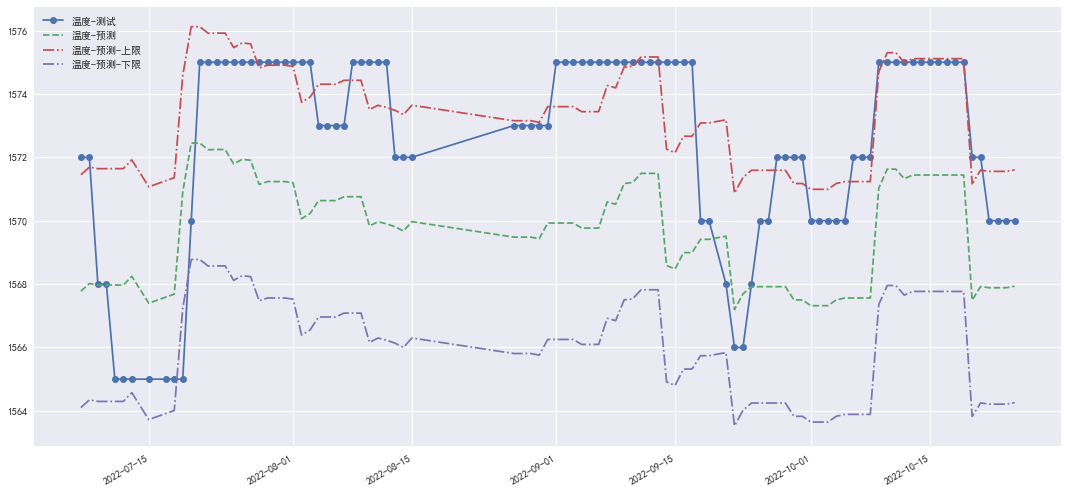

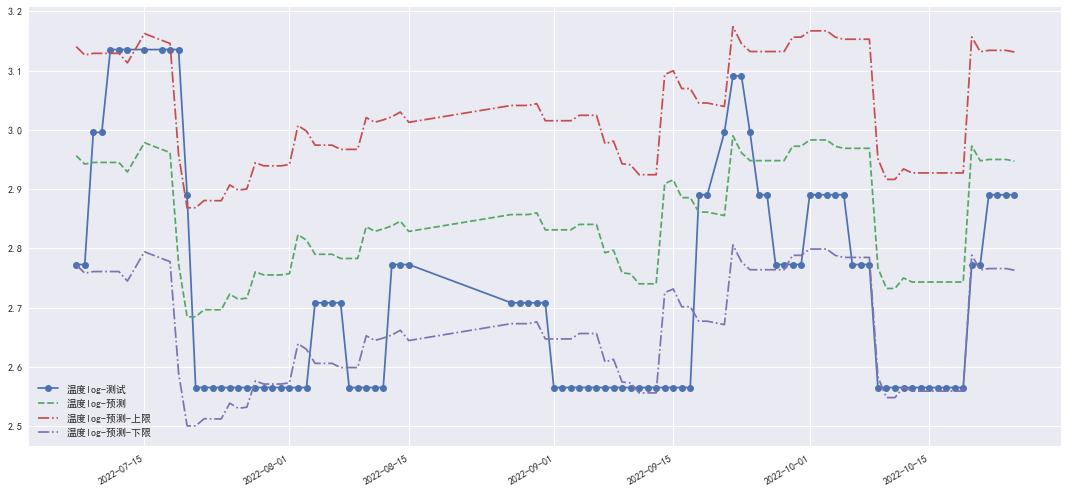

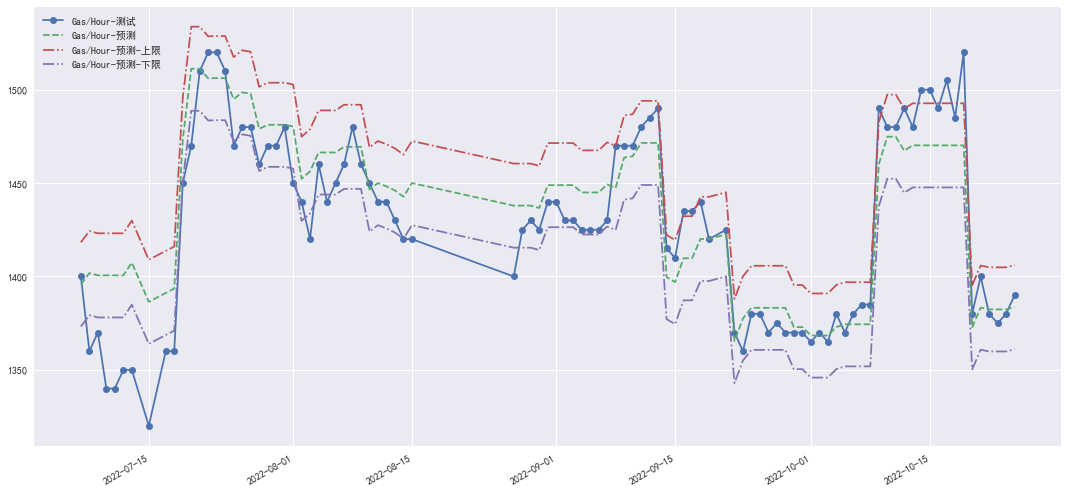

In [17]:
eva_model(grid01,X_train,X_test,y_tem_train,y_tem_test,"温度")
eva_model(grid01,X_train,X_test,y_temlog_train,y_temlog_test,"温度log")
eva_model(grid01,X_train,X_test,y_gas_train,y_gas_test,"Gas/Hour")

核岭回归

In [18]:
from sklearn.kernel_ridge import KernelRidge
# from sklearn.linear_model import Ridge
model = make_pipeline(MinMaxScaler(),PolynomialFeatures(),KernelRidge())
# model = make_pipeline(SimpleImputer(),MinMaxScaler(),PolynomialFeatures(),Ridge())
param_grid = {
        "polynomialfeatures__degree":np.arange(1,5),
        "kernelridge__alpha":loguniform(1e-4,1e0),
    }
grid00 = RandomizedSearchCV(model,param_grid,cv=5,n_iter=50)
# param_grid = {
#         "polynomialfeatures__degree":np.arange(1,5),
#         "ridge__alpha":[0,0.00001,0.0001,0.001,0.01,0.1,1,10,100],
#     }
# grid = GridSearchCV(model,param_grid,cv=5)

温度 误差(%): 0.1824059265557887 均方根误差RSME: 3.2872106108594723 R2分数: train: 0.3128157434745833 test: -0.1078446577874359
温度log 误差(%): 4.926604453024448 均方根误差RSME: 0.1614270383343308 R2分数: train: 0.33699720259728494 test: 0.24811747029284836
Gas/Hour 误差(%): 1.1806289484564525 均方根误差RSME: 21.897042373854003 R2分数: train: 0.6645192978569805 test: 0.8068955494101626


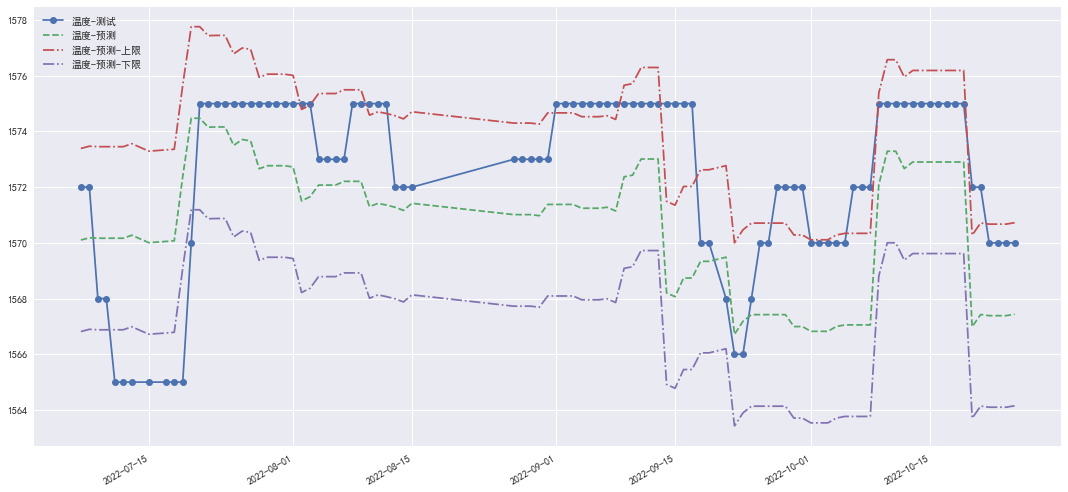

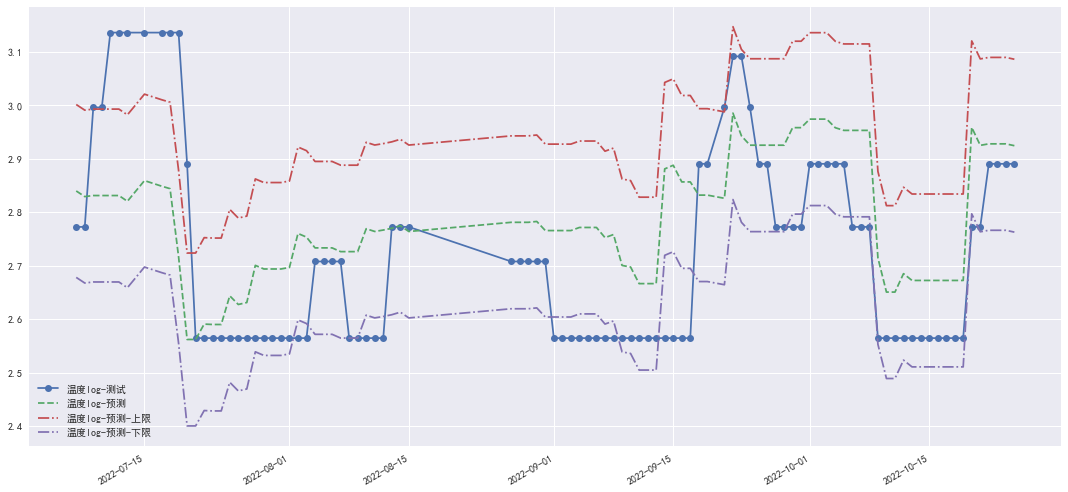

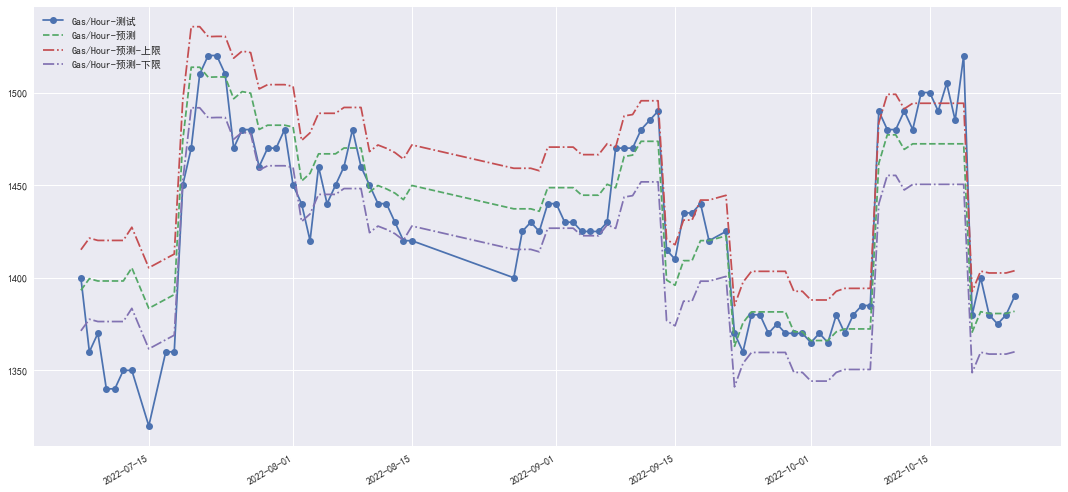

In [19]:
eva_model(grid00,X_train,X_test,y_tem_train,y_tem_test,"温度")
eva_model(grid00,X_train,X_test,y_temlog_train,y_temlog_test,"温度log")
eva_model(grid00,X_train,X_test,y_gas_train,y_gas_test,"Gas/Hour")

3.2 SVR

In [20]:
from sklearn.svm import SVR
model = make_pipeline(MinMaxScaler(),SVR())
# model = make_pipeline(MinMaxScaler(),PolynomialFeatures(degree=5),SVR())
param_grid = {
        # "polynomialfeatures__degree":np.arange(1,5),
        "svr__C":loguniform(1e-4,1e4),
        "svr__gamma":loguniform(1e-4,1e0),
    }
grid02 = RandomizedSearchCV(model,param_grid,cv=5,n_iter=20)
# param_grid = {
#         # "polynomialfeatures__degree":np.arange(1,5),
#         "svr__C":[0,0.0001,0.001,0.01,0.1,1,10,100],
#         "svr__gamma":[0.0001,0.001,0.01,0.1,1],
#     }
# grid = GridSearchCV(model,param_grid,cv=5)

温度 误差(%): 0.17008358977905447 均方根误差RSME: 3.1735906223245705 R2分数: train: -0.11675506471258879 test: -0.032584533910951397
温度log 误差(%): 5.4686221444850505 均方根误差RSME: 0.16726474892057205 R2分数: train: 0.06618198574078304 test: 0.19275329318354884
Gas/Hour 误差(%): 1.1427297227637045 均方根误差RSME: 20.57345921142662 R2分数: train: 0.6512510342319968 test: 0.8295346927723043


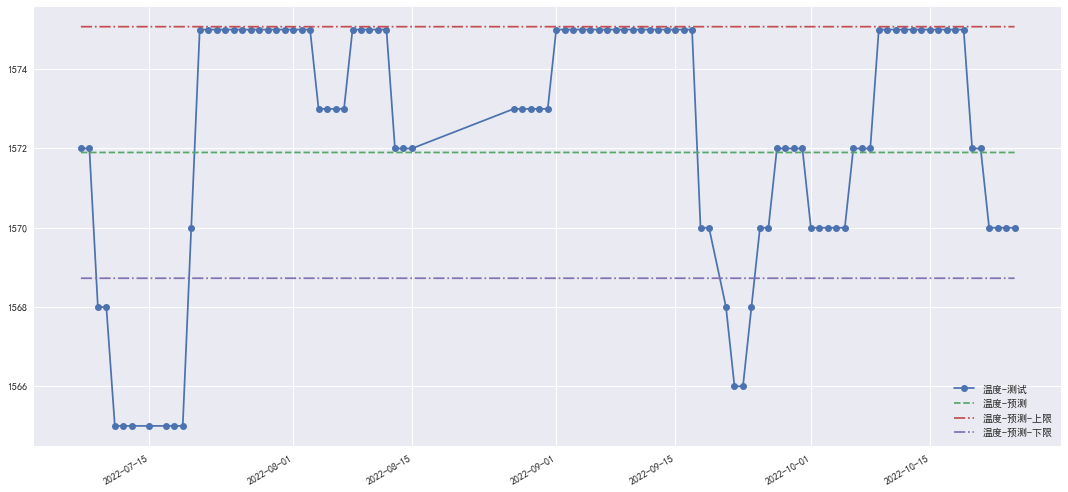

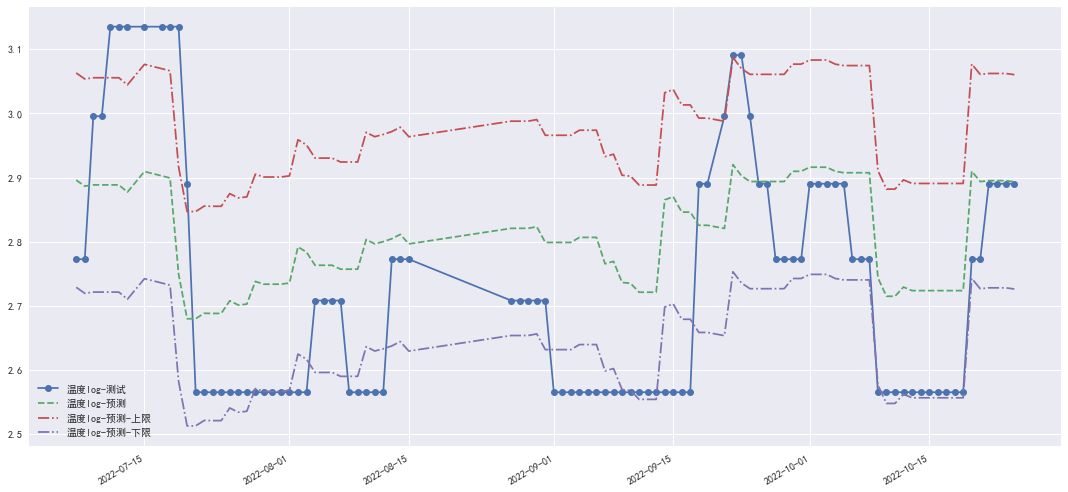

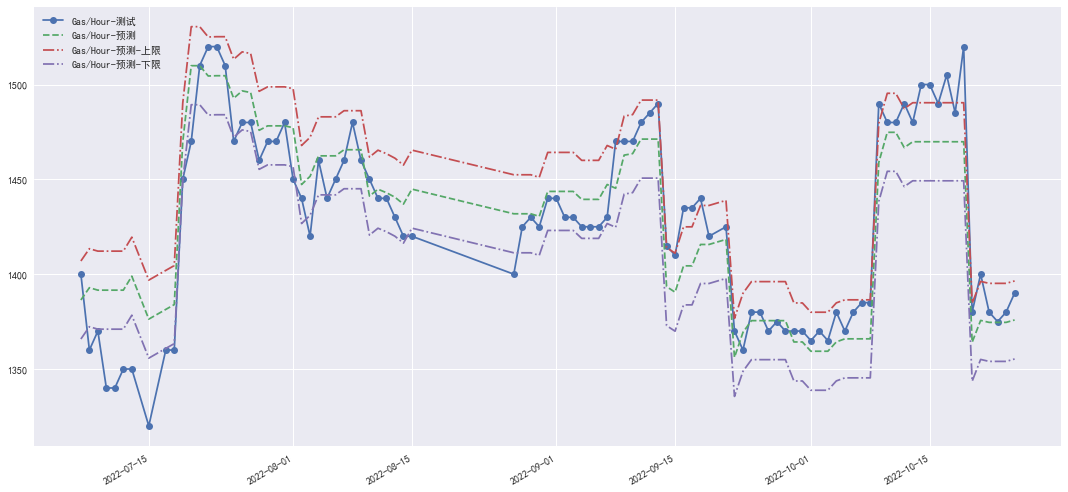

In [21]:
eva_model(grid02,X_train,X_test,y_tem_train,y_tem_test,"温度")
eva_model(grid02,X_train,X_test,y_temlog_train,y_temlog_test,"温度log")
eva_model(grid02,X_train,X_test,y_gas_train,y_gas_test,"Gas/Hour")

3.3 RFR随机森林

In [22]:
from sklearn.ensemble import RandomForestRegressor
model = make_pipeline(RandomForestRegressor())
param_grid = {
        "randomforestregressor__n_estimators":np.arange(1,5)*100
        # "randomforestregressor__n_estimators":[100,500,1000,5000]
    }
grid03 = GridSearchCV(model,param_grid,cv=5)
# grid = GridSearchCV(model,param_grid,cv=5)

温度 误差(%): 0.15430396238818783 均方根误差RSME: 2.943366902372176 R2分数: train: 0.9528534742797097 test: 0.11179623133883654
温度log 误差(%): 5.330450337532175 均方根误差RSME: 0.1756080514164418 R2分数: train: 0.9397795003919701 test: 0.11021253377908502
Gas/Hour 误差(%): 1.4439243021566877 均方根误差RSME: 25.536603574140855 R2分数: train: 0.965503426444376 test: 0.7373680035926804


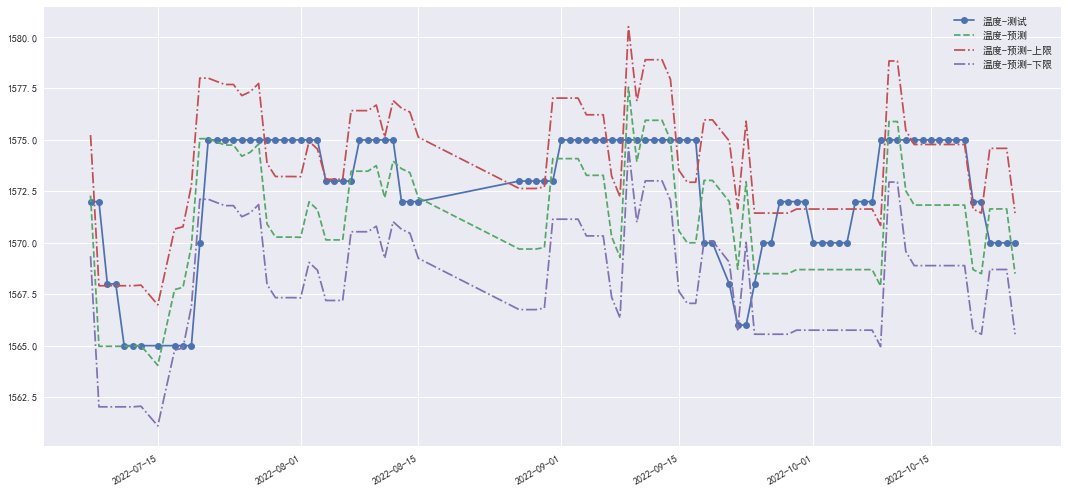

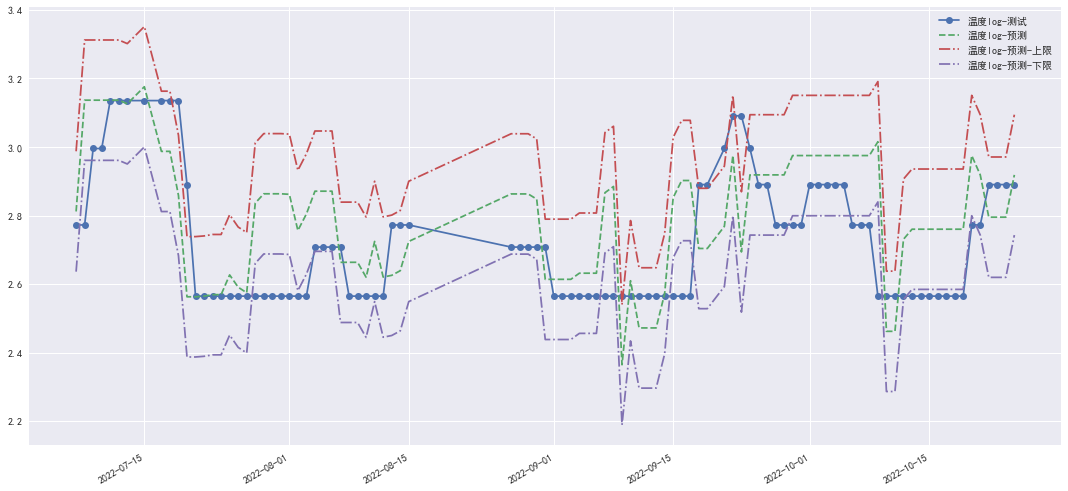

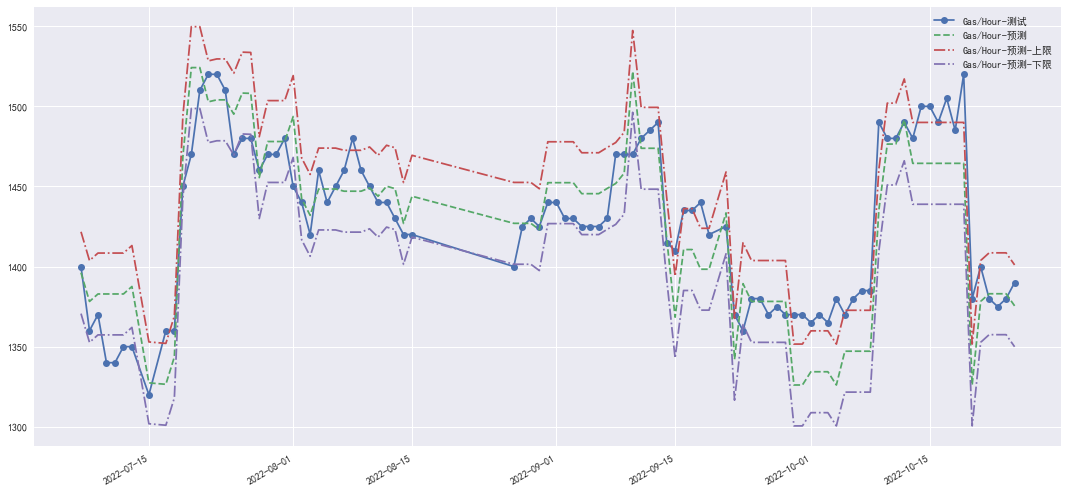

In [23]:
eva_model(grid03,X_train,X_test,y_tem_train,y_tem_test,"温度")
eva_model(grid03,X_train,X_test,y_temlog_train,y_temlog_test,"温度log")
eva_model(grid03,X_train,X_test,y_gas_train,y_gas_test,"Gas/Hour")

AdaBoostRegressor模型

In [24]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
model = make_pipeline(AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=300,random_state=0))
param_grid = {
        "adaboostregressor__n_estimators":[50,100,200,300,400],
        # "adaboostregressor__learning_rate":stats.uniform(0,1),
        "adaboostregressor__learning_rate":loguniform(1e-4,1e2),
        # "adaboostregressor__learning_rate":[0.001,0.01,0.1,1],
    }
grid04 = RandomizedSearchCV(model,param_grid,cv=5)
# grid = GridSearchCV(model,param_grid,cv=5)

温度 误差(%): 0.14129120557190905 均方根误差RSME: 3.7347628583683092 R2分数: train: 0.18182962257624646 test: -0.4300455466689914
温度log 误差(%): 7.003961283260014 均方根误差RSME: 0.2376631667927149 R2分数: train: 0.9687129231783131 test: -0.6297507719215569
Gas/Hour 误差(%): 1.2253114321473166 均方根误差RSME: 21.21059459197751 R2分数: train: 0.8892421565125904 test: 0.8188129925504329


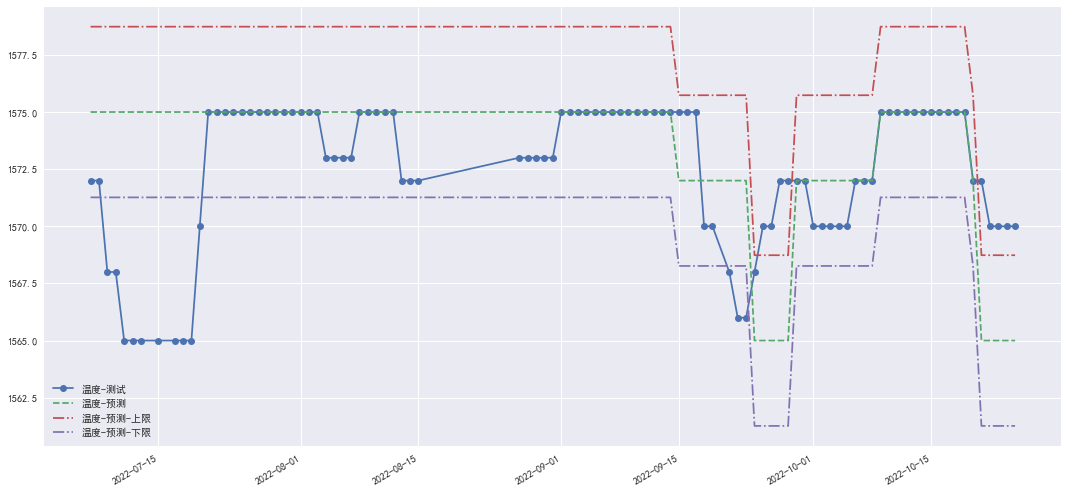

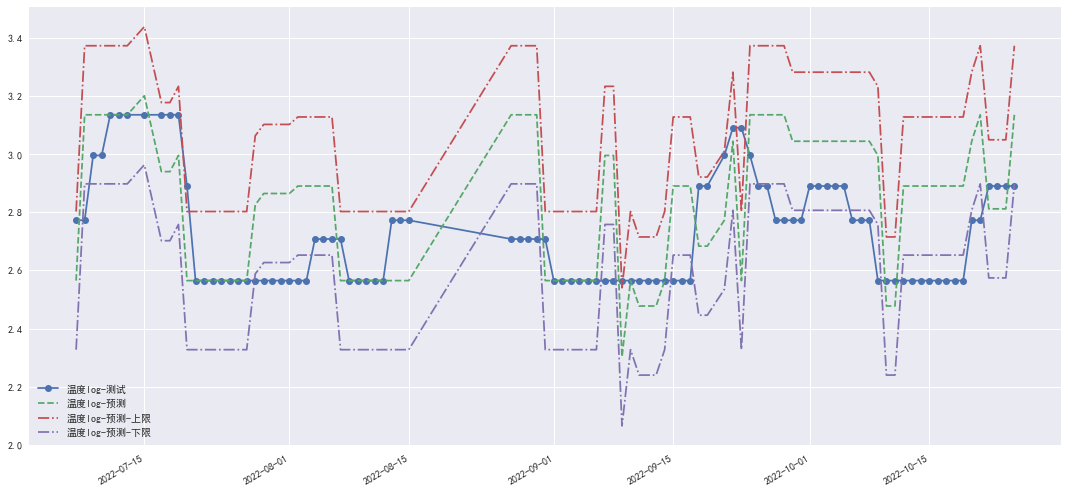

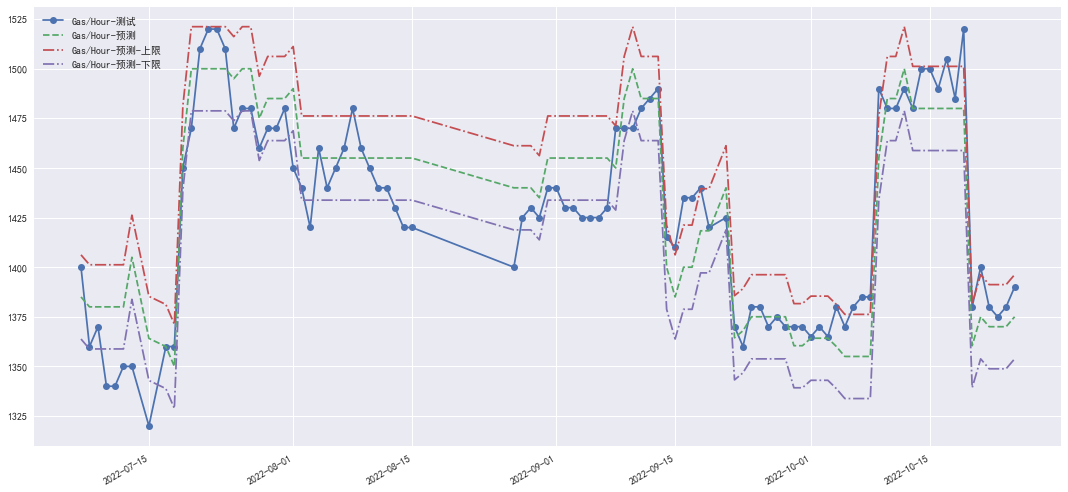

In [25]:
eva_model(grid04,X_train,X_test,y_tem_train,y_tem_test,"温度")
eva_model(grid04,X_train,X_test,y_temlog_train,y_temlog_test,"温度log")
eva_model(grid04,X_train,X_test,y_gas_train,y_gas_test,"Gas/Hour")

XGBRegressor模型

In [26]:
from xgboost import XGBRegressor
model = make_pipeline(XGBRegressor(n_estimators=100,learning_rate=0.1,gamma=0))
param_grid = {
        "xgbregressor__n_estimators":[50,100,200,300],
        # "xgbregressor__learning_rate":stats.uniform(0,1),
        "xgbregressor__learning_rate":loguniform(1e-4,1e0),
        "xgbregressor__gamma":loguniform(1e-4,1e0),
        "xgbregressor__alpha":loguniform(1e-4,1e0),
        # "xgbregressor__alpha":[0,0.0001,0.001,0.01,0.1,1],
    }
grid05 = RandomizedSearchCV(model,param_grid,cv=5)
# grid = GridSearchCV(model,param_grid,cv=5)

温度 误差(%): 0.15395962344066882 均方根误差RSME: 3.2823167730463947 R2分数: train: 0.9767205042716928 test: -0.10454850368984214
温度log 误差(%): 4.805260881027557 均方根误差RSME: 0.16158048388865526 R2分数: train: 0.878291435072119 test: 0.2466873769571417
Gas/Hour 误差(%): 1.2838573351134033 均方根误差RSME: 22.045781285954725 R2分数: train: 0.9387452282241754 test: 0.8042632582421431


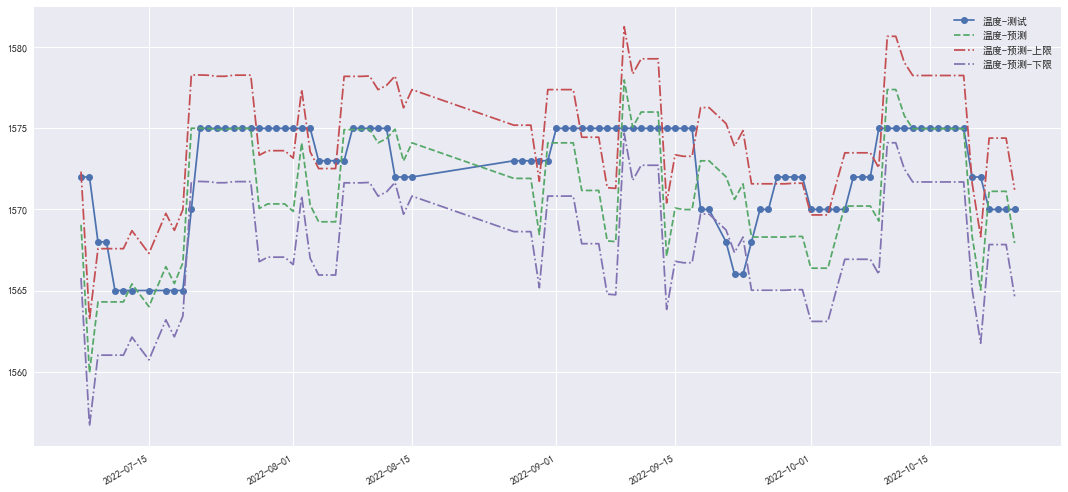

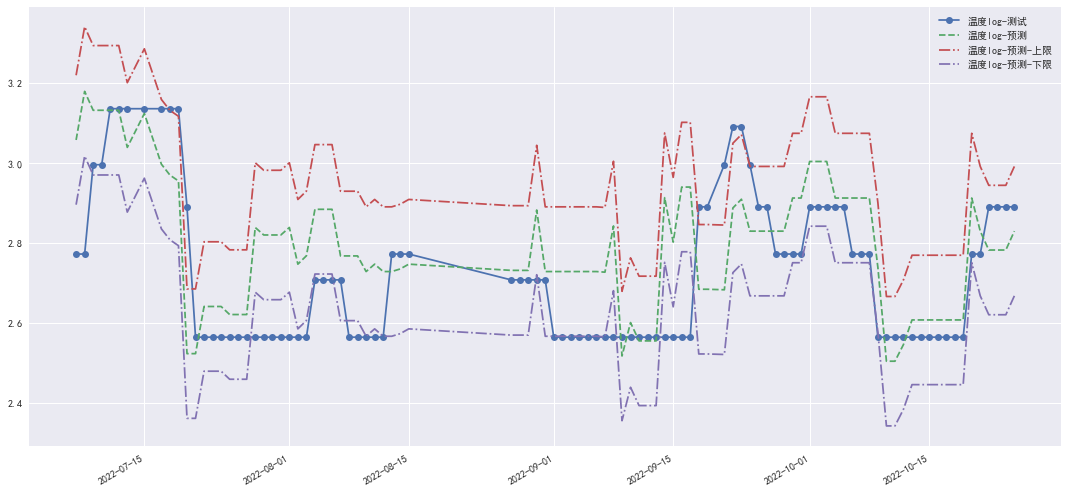

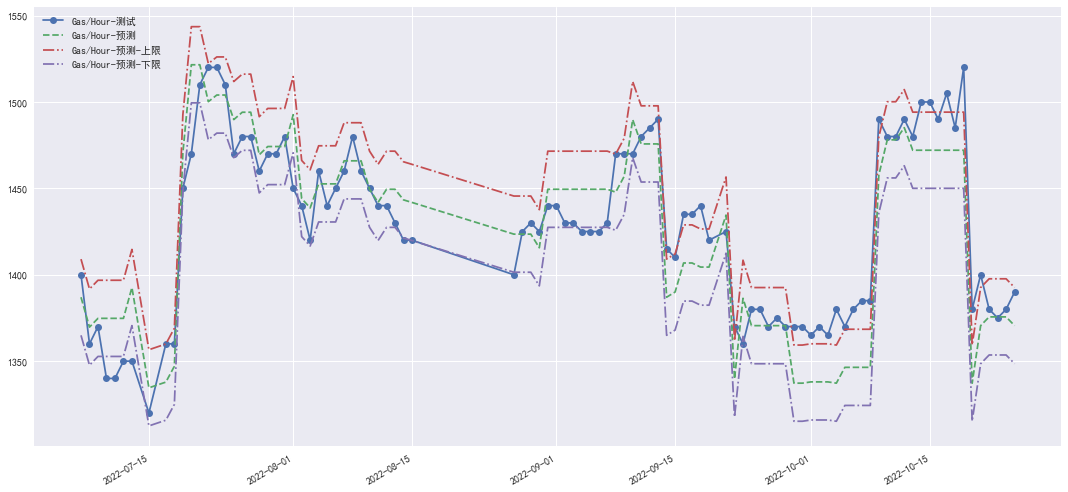

In [27]:
eva_model(grid05,X_train,X_test,y_tem_train,y_tem_test,"温度")
eva_model(grid05,X_train,X_test,y_temlog_train,y_temlog_test,"温度log")
eva_model(grid05,X_train,X_test,y_gas_train,y_gas_test,"Gas/Hour")

3.4 LightGBM

In [28]:
import lightgbm as lgb

model = make_pipeline(lgb.LGBMRegressor())
param_grid = {
        "lgbmregressor__n_estimators":[100,200,300],
        "lgbmregressor__learning_rate":stats.uniform(0,1),
        # "lgbmregressor__learning_rate":loguniform(1e-4,1e0),
        "lgbmregressor__reg_alpha":loguniform(1e-4,1e0),
        # "lgbmregressor__reg_alpha":[0,0.0001,0.001,0.01,0.1,1,10,100],
        # "randomforestregressor__n_estimators":[100,500,1000,5000]
    }
grid06 = RandomizedSearchCV(model,param_grid,cv=5,n_iter=20)
# grid = GridSearchCV(model,param_grid,cv=5)
# grid.fit(X_train,y_tem_train)
# grid.best_params_

温度 误差(%): 0.13677176103547023 均方根误差RSME: 2.6998312721764544 R2分数: train: 0.8643171340851066 test: 0.25269643424749744
温度log 误差(%): 4.68211031539552 均方根误差RSME: 0.15670014159964452 R2分数: train: 0.7208990132289248 test: 0.29150593933712665
Gas/Hour 误差(%): 1.3518757202825213 均方根误差RSME: 22.920721158314457 R2分数: train: 0.8995846404578657 test: 0.7884183881431485


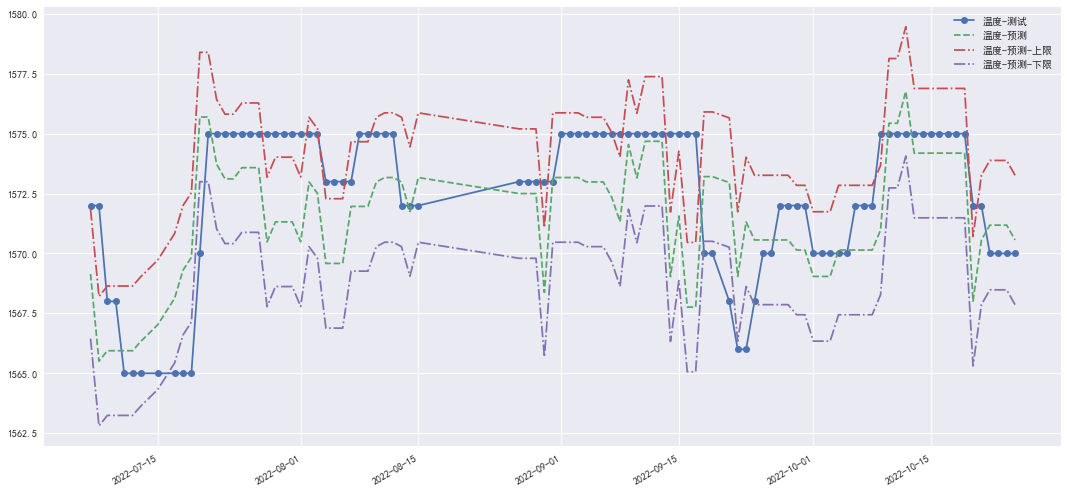

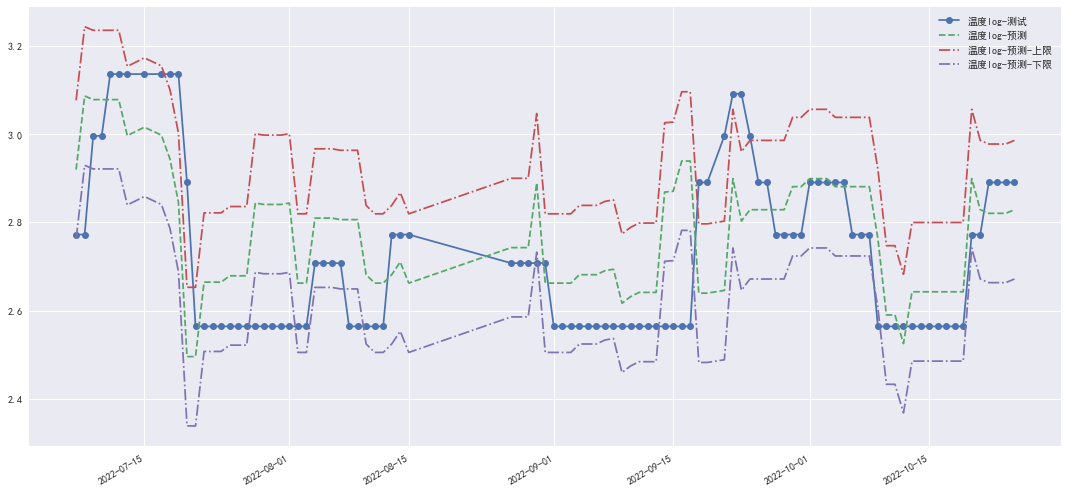

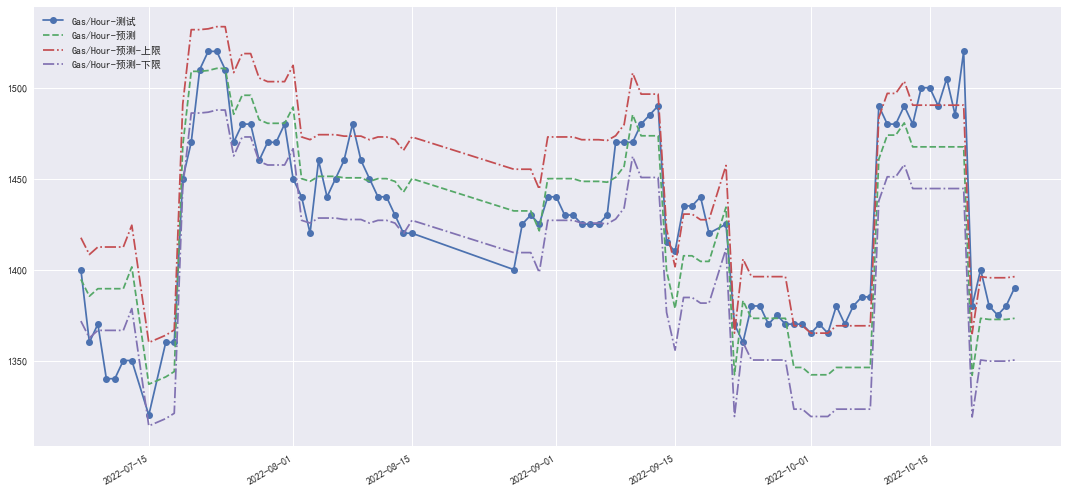

In [29]:
eva_model(grid06,X_train,X_test,y_tem_train,y_tem_test,"温度")
eva_model(grid06,X_train,X_test,y_temlog_train,y_temlog_test,"温度log")
eva_model(grid06,X_train,X_test,y_gas_train,y_gas_test,"Gas/Hour")

3.5 GBR梯度提升机

In [30]:
from sklearn.ensemble import GradientBoostingRegressor,HistGradientBoostingRegressor
model = make_pipeline(GradientBoostingRegressor())
param_grid = {
        "gradientboostingregressor__n_estimators":[50,100,200,300,400],
        # "gradientboostingregressor__n_estimators":[5,10,100,1000],
        "gradientboostingregressor__learning_rate":loguniform(1e-4,1e0),
        # "gradientboostingregressor__learning_rate":stats.uniform(0,1),
        "gradientboostingregressor__alpha":loguniform(1e-4,1e0),
        # "gradientboostingregressor__alpha":[0,0.0001,0.001,0.01,0.1,1],
        # "gradientboostingregressor__max_depth":[1,2,3,4,5],
    }
grid07 = RandomizedSearchCV(model,param_grid,cv=5)
# grid = GridSearchCV(model,param_grid,cv=5)

温度 误差(%): 0.148068322228849 均方根误差RSME: 2.94915463395811 R2分数: train: 0.9081506335937446 test: 0.10829973266433868
温度log 误差(%): 5.934764315001664 均方根误差RSME: 0.1783131633710894 R2分数: train: 0.3475011122240508 test: 0.08258836138299586
Gas/Hour 误差(%): 1.2712186554406608 均方根误差RSME: 22.235232987677307 R2分数: train: 0.7731386158548308 test: 0.8008846531182335


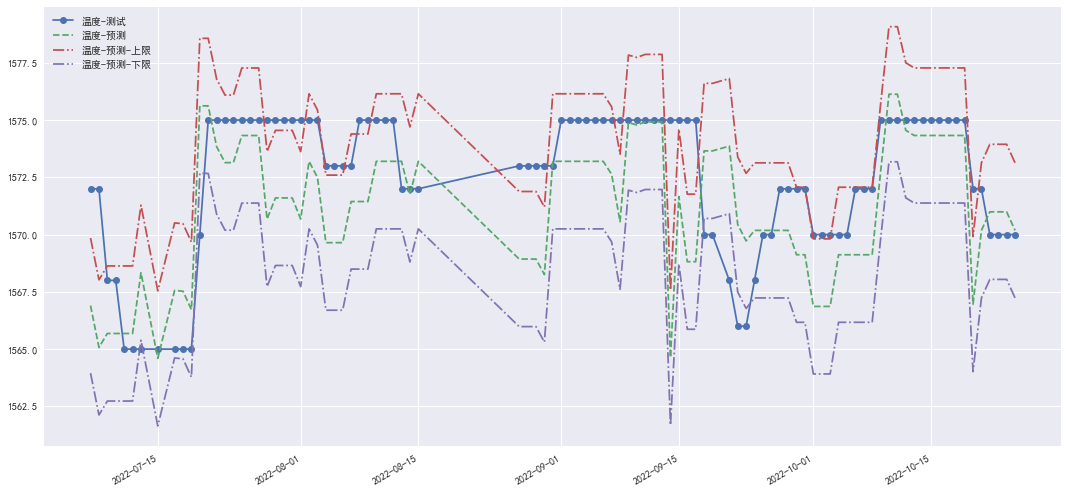

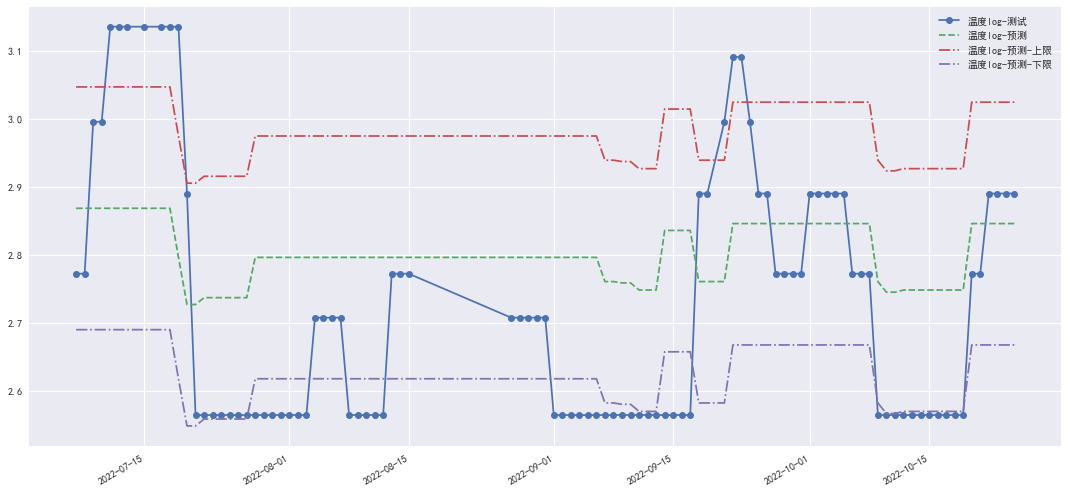

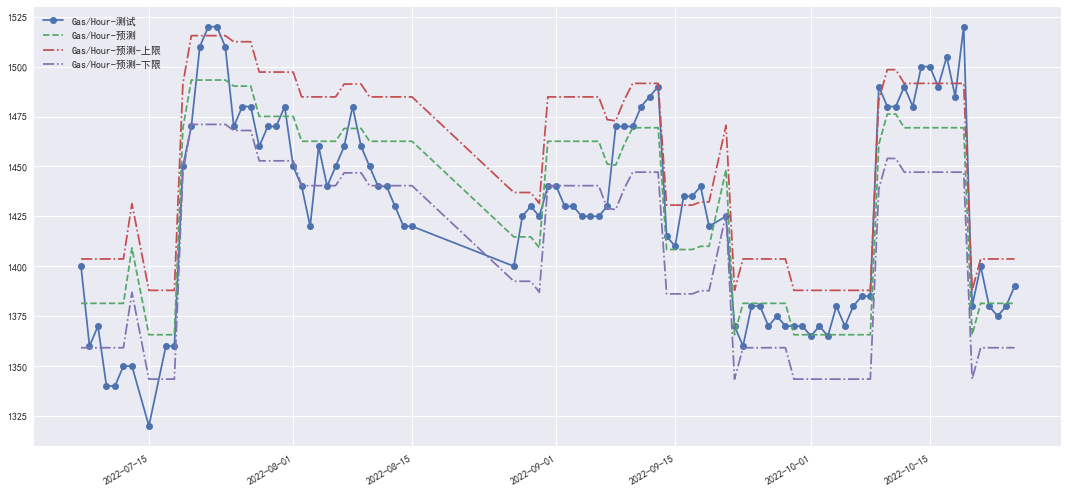

In [31]:
eva_model(grid07,X_train,X_test,y_tem_train,y_tem_test,"温度")
eva_model(grid07,X_train,X_test,y_temlog_train,y_temlog_test,"温度log")
eva_model(grid07,X_train,X_test,y_gas_train,y_gas_test,"Gas/Hour")

In [32]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
model = make_pipeline(HistGradientBoostingRegressor())
param_grid = {
        # "gradientboostingregressor__n_estimators":[50,100,200,300,400],
        # "gradientboostingregressor__n_estimators":[5,10,100,1000],
        "histgradientboostingregressor__learning_rate":loguniform(1e-4,1e0),
        # "gradientboostingregressor__learning_rate":stats.uniform(0,1),
        "histgradientboostingregressor__l2_regularization":loguniform(1e-4,1e0),
        # "gradientboostingregressor__alpha":[0,0.0001,0.001,0.01,0.1,1],
        # "gradientboostingregressor__max_depth":[1,2,3,4,5],
    }
grid17 = RandomizedSearchCV(model,param_grid,cv=5)
# grid = GridSearchCV(model,param_grid,cv=5)

k:\python\Python310\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


温度 误差(%): 0.20817648614391118 均方根误差RSME: 3.6440366488984033 R2分数: train: 0.2914586984159998 test: -0.3614110767093608
温度log 误差(%): 6.777250306343328 均方根误差RSME: 0.20243779619690444 R2分数: train: 0.20609067497705347 test: -0.18244415175808903
Gas/Hour 误差(%): 1.2728333434746253 均方根误差RSME: 23.596062743029417 R2分数: train: 0.7639944956299765 test: 0.7757665234406723


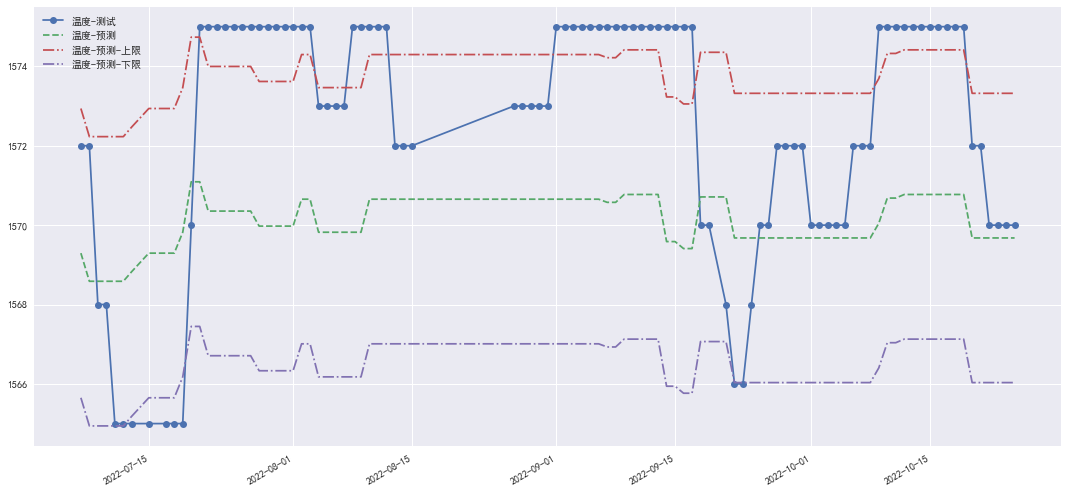

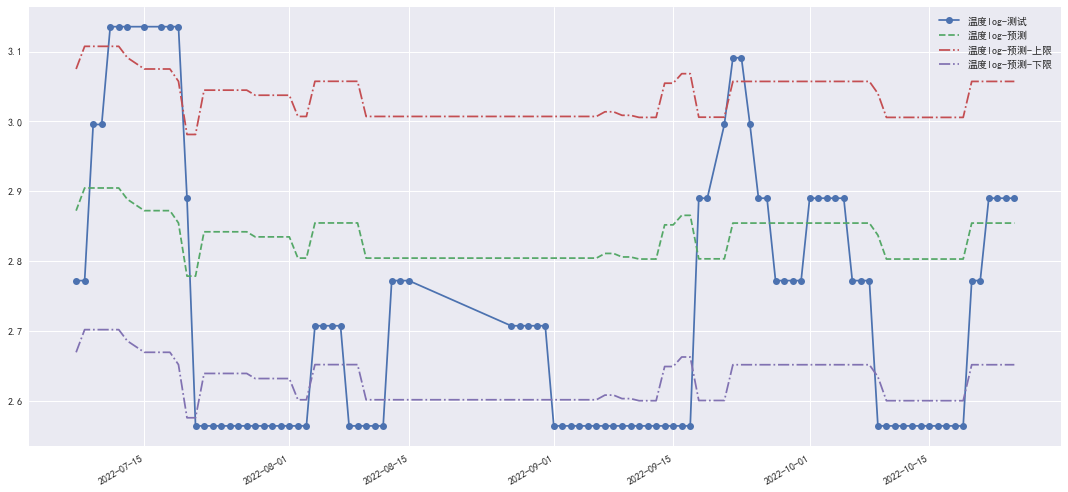

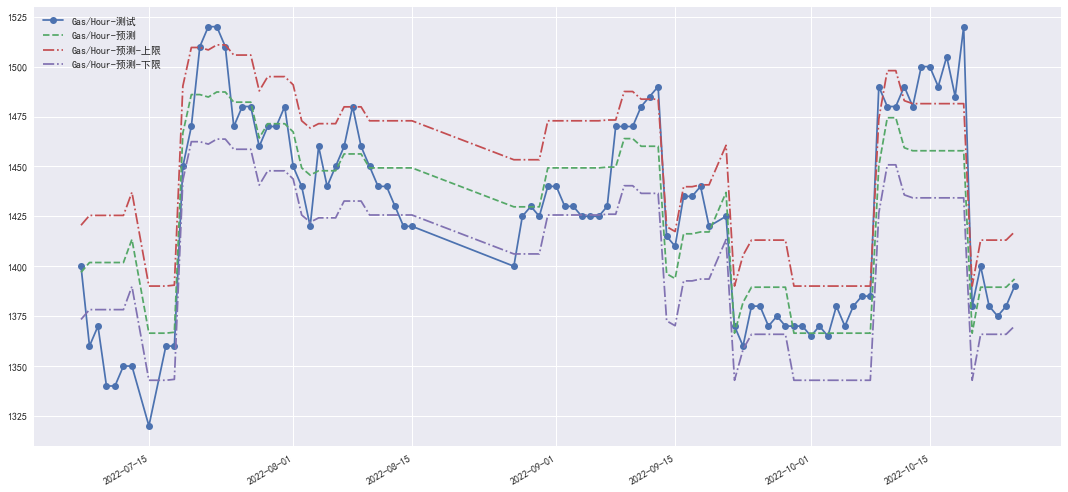

In [33]:
eva_model(grid17,X_train,X_test,y_tem_train,y_tem_test,"温度")
eva_model(grid17,X_train,X_test,y_temlog_train,y_temlog_test,"温度log")
eva_model(grid17,X_train,X_test,y_gas_train,y_gas_test,"Gas/Hour")

MLP神经网络

In [34]:
from sklearn.neural_network import MLPRegressor
# model = make_pipeline(StandardScaler(),MLPRegressor(solver="lbfgs"))
model = make_pipeline(MinMaxScaler(),MLPRegressor(solver="lbfgs"))
param_grid = {
        "mlpregressor__solver":['lbfgs', 'sgd', 'adam'],
        "mlpregressor__hidden_layer_sizes":[(50,50,10)],
        # "mlpregressor__hidden_layer_sizes":[(10,),(50,),(100,),(100,30)],
        # "mlpregressor__learning_rate_init":[0.0001,0.001,0.01,0.1,1],
        "mlpregressor__alpha":loguniform(1e-5,1e0),
        # "mlpregressor__alpha":[0,0.00001,0.0001,0.001,0.01,0.1,1,10,100],
        "mlpregressor__max_iter":[2000],
    }
grid08 = RandomizedSearchCV(model,param_grid,cv=5,n_iter=20)
# grid = GridSearchCV(model,param_grid,cv=5)

k:\python\Python310\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
k:\python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
k:\python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
k:\python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
k:\python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
k:\python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
k:\python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: 

温度 误差(%): 0.1266190325317956 均方根误差RSME: 2.4565623613262035 R2分数: train: 0.5673459732338656 test: 0.3813010279871124


k:\python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
k:\python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
k:\python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED

温度log 误差(%): 4.910037157328902 均方根误差RSME: 0.15507673726838378 R2分数: train: 0.35683710921432854 test: 0.3061098121345269


k:\python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
k:\python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
k:\python\Python310\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
k:\python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
k:\python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
k:\python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
k:\python\Python310\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWa

Gas/Hour 误差(%): 1.2300633573651611 均方根误差RSME: 22.701915263803215 R2分数: train: 0.6750451459651653 test: 0.7924387094327109


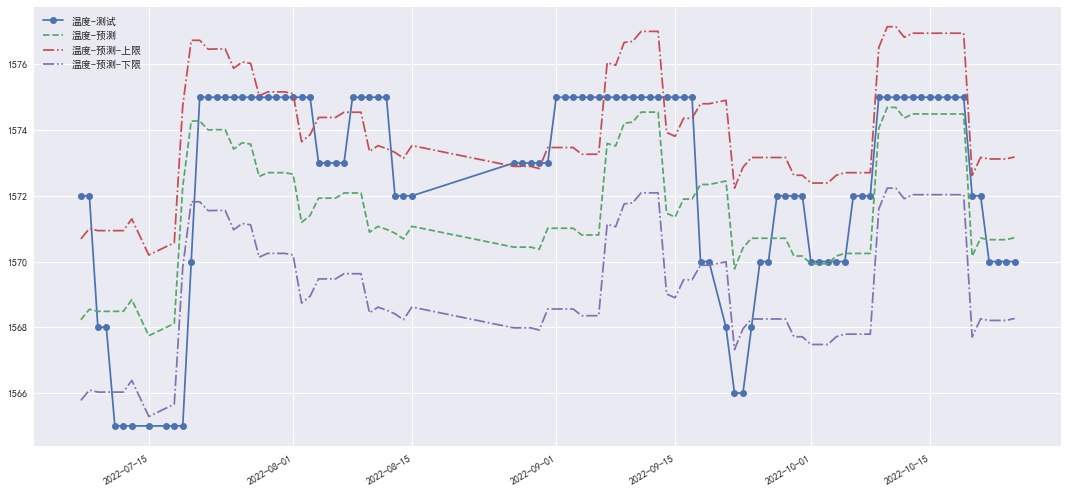

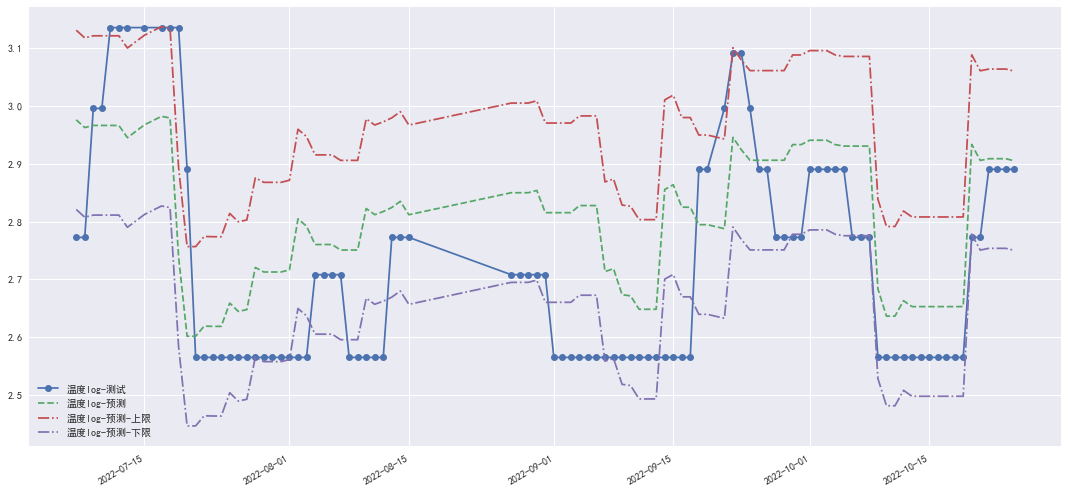

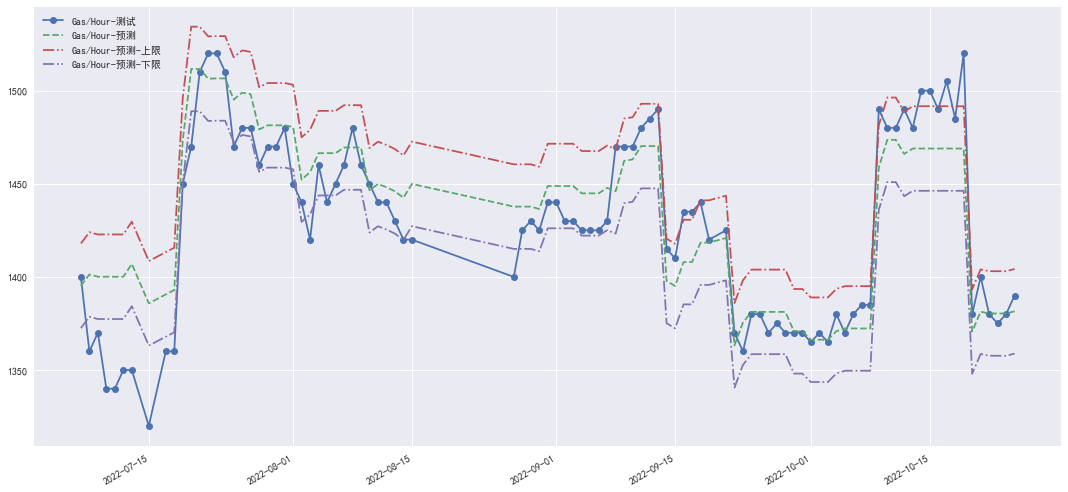

In [35]:
eva_model(grid08,X_train,X_test,y_tem_train,y_tem_test,"温度")
eva_model(grid08,X_train,X_test,y_temlog_train,y_temlog_test,"温度log")
eva_model(grid08,X_train,X_test,y_gas_train,y_gas_test,"Gas/Hour")

VotingRegressor模型

In [36]:
from sklearn.ensemble import VotingRegressor

model = VotingRegressor([("m00",grid00),("m01",grid01),("m02",grid02),("m03",grid03),("m04",grid04),("m05",grid05),("m06",grid06),("m07",grid07)])

温度 误差(%): 0.15883255561047158 均方根误差RSME: 2.823551860262187 R2分数: train: 0.7916172321214013 test: 0.1826363020320042
温度log 误差(%): 5.277936506331679 均方根误差RSME: 0.16146608782414537 R2分数: train: 0.6423335490043962 test: 0.24775366283304556
Gas/Hour 误差(%): 1.215858751464813 均方根误差RSME: 21.017907940162875 R2分数: train: 0.8447739720603816 test: 0.8220900094214248


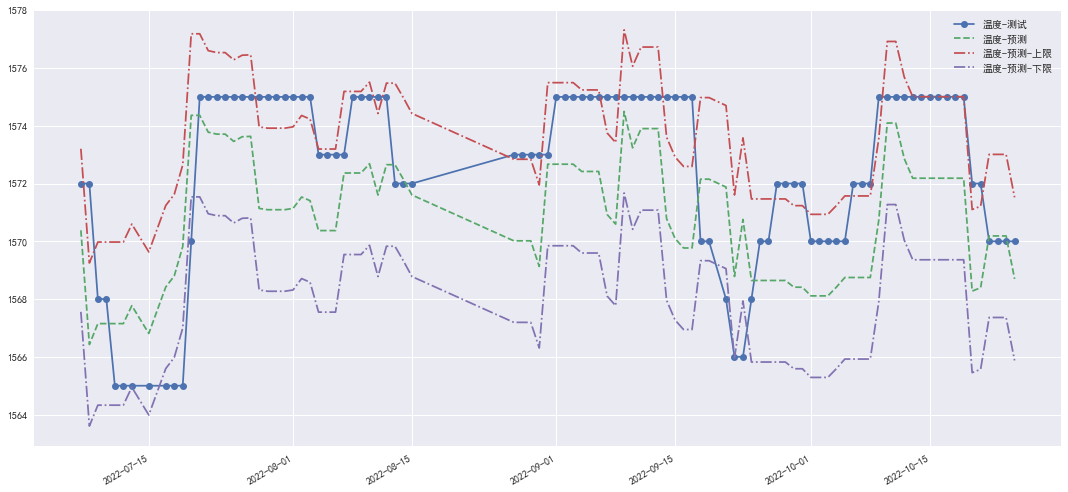

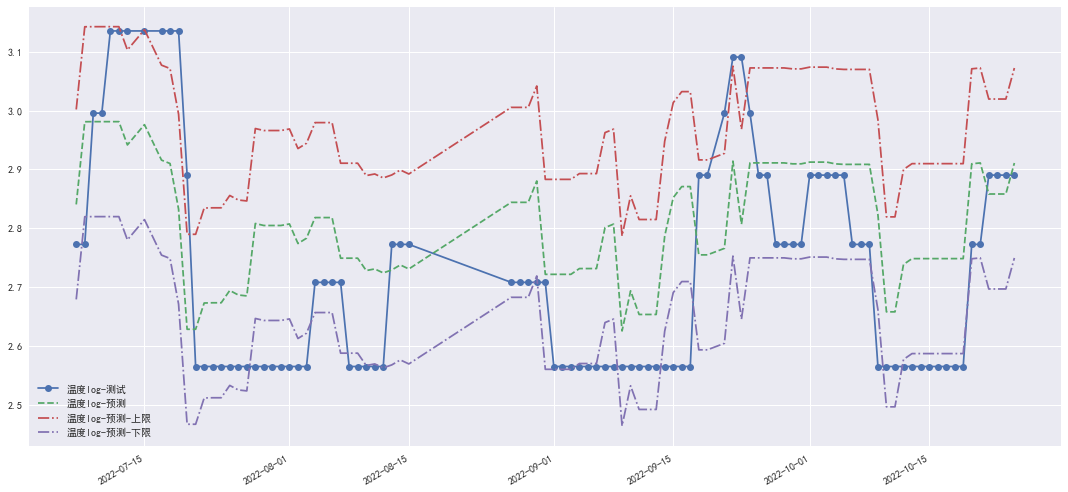

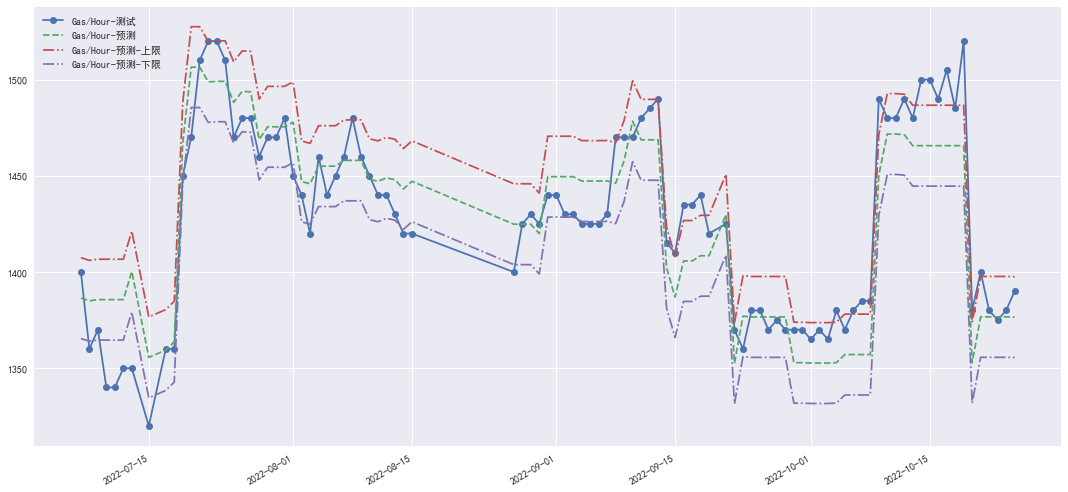

In [37]:
eva_model(model,X_train,X_test,y_tem_train,y_tem_test,"温度")
eva_model(model,X_train,X_test,y_temlog_train,y_temlog_test,"温度log")
eva_model(model,X_train,X_test,y_gas_train,y_gas_test,"Gas/Hour")